In [1]:
# ASTR19 Project

In [3]:
!python3 -m pip install 'scipy<1.10.0,>=1.6.0' 'urllib3<2.0' matplotlib 'numpy<1.23' 'tensorflow<2.16' --user --force-reinstall

  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other require

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from scipy import optimize

2.13.1


In [5]:
data = np.genfromtxt('group_proj_data.txt', dtype=[('myint','i8'),('mystring','U6'),('myfloat','f8')])

day = []
time = []
height = []
for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print(' ')
print(time)
print(' ')
print(height)
print(' ')

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
 
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:2

In [6]:
high_tide = []
for i in range(0,82, 2):
    high_tide.append(height[i])
print(high_tide)



[6.57, 5.38, 5.26, 4.13, 3.48, 2.62, 1.83, 3.57, 4.54, 3.76, 3.9, 4.73, 5.66, 5.33, 5.23, 6.67, 4.74, 4.69, 4.2, 3.68, 2.47, 2.59, 4.1, 3.17, 3.71, 4.04, 4.07, 5.93, 6.89, 6.72, 6.77, 5.77, 4.35, 4.23, 2.24, 3.45, 4.13, 3.34, 3.32, 5.21, 4.83]


In [7]:
hours = []
minutes = []

for i in range(82):
    x = time[i].split(':')
    hours.append(float(x[0]))
    minutes.append(float(x[1]))
    
print(hours)
# print(minutes)

for i in range(len(minutes)):
   minutes[i] = minutes[i] / 60

print(minutes)

true_days = []

for i in range(82):
    true_days.append(hours[i] + minutes[i])
    true_days[i] = true_days[i] / 24
    true_days[i] = true_days[i] + day[i]
    
print(true_days)

[8.0, 15.0, 8.0, 16.0, 9.0, 17.0, 10.0, 18.0, 11.0, 18.0, 12.0, 19.0, 13.0, 20.0, 3.0, 21.0, 4.0, 21.0, 4.0, 11.0, 5.0, 12.0, 6.0, 13.0, 6.0, 14.0, 7.0, 15.0, 7.0, 15.0, 8.0, 16.0, 9.0, 16.0, 9.0, 17.0, 10.0, 17.0, 10.0, 18.0, 11.0, 18.0, 12.0, 19.0, 2.0, 19.0, 2.0, 20.0, 3.0, 10.0, 4.0, 11.0, 5.0, 12.0, 6.0, 13.0, 7.0, 14.0, 7.0, 15.0, 8.0, 16.0, 9.0, 16.0, 10.0, 17.0, 11.0, 18.0, 12.0, 18.0, 1.0, 19.0, 2.0, 20.0, 2.0, 9.0, 3.0, 11.0, 4.0, 12.0, 5.0, 13.0]
[0.11666666666666667, 0.6166666666666667, 0.9166666666666666, 0.4166666666666667, 0.75, 0.23333333333333334, 0.5833333333333334, 0.0, 0.4666666666666667, 0.7666666666666667, 0.36666666666666664, 0.5166666666666667, 0.4, 0.26666666666666666, 0.36666666666666664, 0.016666666666666666, 0.11666666666666667, 0.7666666666666667, 0.8333333333333334, 0.9666666666666667, 0.5166666666666667, 0.9333333333333333, 0.13333333333333333, 0.75, 0.7833333333333333, 0.4166666666666667, 0.36666666666666664, 0.0, 0.9833333333333333, 0.5666666666666667, 

In [8]:
high_tide_time = []
for i in range(0,82, 2):
    high_tide_time.append(true_days[i])
print(high_tide_time)

[1.3381944444444445, 2.3715277777777777, 3.40625, 4.440972222222222, 5.477777777777778, 6.5152777777777775, 7.558333333333334, 8.140277777777778, 9.171527777777778, 10.20138888888889, 11.229861111111111, 12.255555555555556, 13.282638888888888, 14.306944444444444, 15.332638888888889, 16.356944444444444, 17.381944444444443, 18.40625, 19.43125, 20.45625, 21.48472222222222, 22.51736111111111, 23.09861111111111, 24.12361111111111, 25.150694444444444, 26.18263888888889, 27.21875, 28.25625, 29.29513888888889, 30.331944444444446, 31.368055555555557, 32.40277777777778, 33.4375, 34.47152777777778, 35.50694444444444, 36.06388888888889, 37.09236111111111, 38.12083333333333, 39.15208333333333, 40.18680555555556, 41.22291666666667]


In [9]:
x, y, y_err = high_tide_time, high_tide, 0.25

[W 2024-11-26 13:04:08,962.962 matplotlib.legend] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


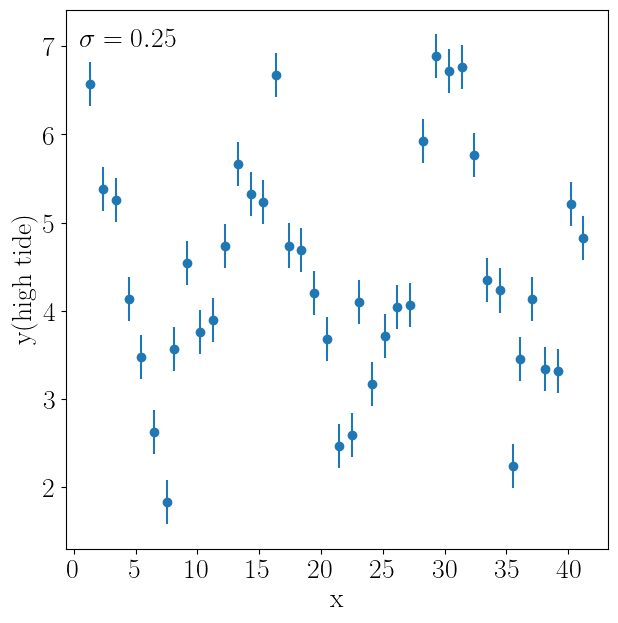

In [10]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f, ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o')
ax.text(0.5,7,r'$\sigma = 0.25$',color='0', fontsize=20)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y(high tide)',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)


In [11]:
def cosinusoid(x,A,f,p):
    return A*40*np.cos(f*0.5*x+p)+2
    

In [12]:
A_init = 2.0
A_fit = tf.Variable(A_init, name='amplitude')

f_init = 2.0
f_fit = tf.Variable(f_init, name='frequency')

p_init = 2.0
p_fit = tf.Variable(p_init, name='phase')

In [13]:
@tf.function
def cosinusoidal_model(x):
    return A_fit*tf.math.cos(f_fit*x + p_fit)

In [14]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [16]:
epochs = 10000
display_step = 1000

for epoch in range(epochs):
    
    if((epoch%display_step)==0):
       pred = cosinusoidal_model(x)
       loss = mse(pred,y)
       
       print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p:{p_fit.numpy()}")
       
    with tf.GradientTape() as g:
       pred = cosinusoidal_model(x)
       loss = mse(y,pred)
       
    gradients = g.gradient(loss, [A_fit,f_fit,p_fit])
       
    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,p_fit]))
print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p:{p_fit.numpy()}")
print("Done!")
       

Epoch 0 | Loss 23.460971639844043, A: 2.0 f: 2.0 p:2.0
Epoch 1000 | Loss 21.180720564192757, A: 0.1442885547876358 f: 1.9272199869155884 p:3.010709285736084
Epoch 2000 | Loss 21.180720526043586, A: 0.14425961673259735 f: 1.9271634817123413 p:3.015439987182617
Epoch 3000 | Loss 21.18072052775075, A: 0.14425964653491974 f: 1.9271634817123413 p:3.015439987182617
Epoch 4000 | Loss 21.180720858278384, A: 0.14425934851169586 f: 1.9271632432937622 p:3.0154471397399902
Epoch 5000 | Loss 21.180720600626806, A: 0.1442594677209854 f: 1.9271634817123413 p:3.015446901321411
Epoch 6000 | Loss 21.180720457688892, A: 0.14425858855247498 f: 1.9271633625030518 p:3.015446901321411
Epoch 7000 | Loss 21.180720685483575, A: 0.1442592591047287 f: 1.9271628856658936 p:3.0154457092285156
Epoch 8000 | Loss 21.18072034130085, A: 0.14426060020923615 f: 1.927162766456604 p:3.0154471397399902
Epoch 9000 | Loss 21.180720798235935, A: 0.14425814151763916 f: 1.9271607398986816 p:3.015442371368408
Epoch 9999 | Loss 21.

In [17]:
x_model = np.sort(x)
y_model = cosinusoid(x_model,A_fit,f_fit,p_fit)

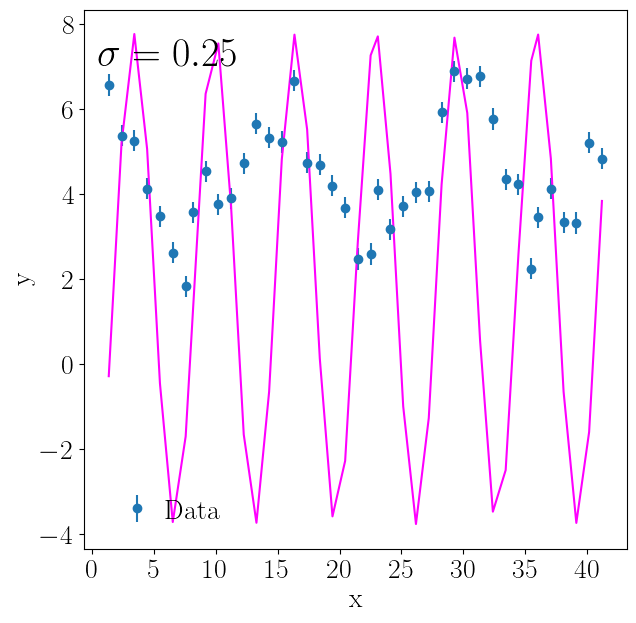

In [18]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f, ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.text(0.5,7,r'$\sigma = 0.25$',color='0', fontsize=29)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')

In [19]:
x, y, y_err = true_days, height, 0.25

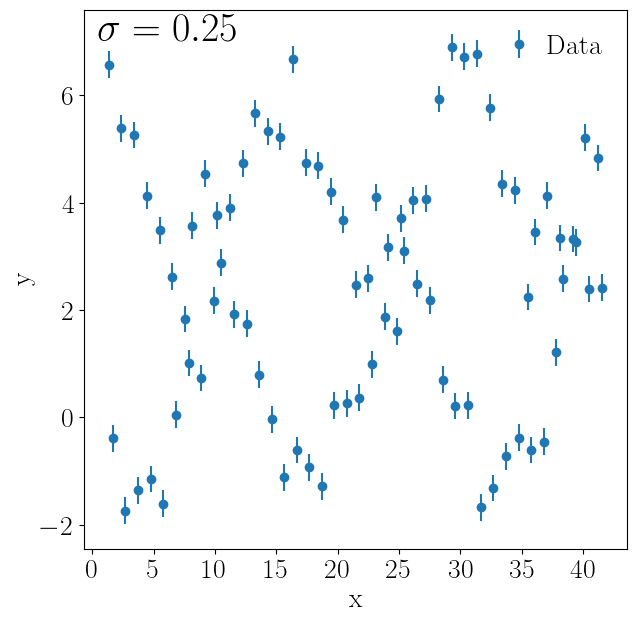

In [20]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f, ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.text(0.5,7,r'$\sigma = 0.25$',color='0', fontsize=29)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)


In [176]:
def cosinusoid(x,A,f,p,c,z,k,q):
#    Amplitude = z*np.absolute((np.cos(f*x+k)))+q
#    return Amplitude*np.sin(A*x+p)+c
#    Amplitude = z*np.fabs( np.cos(f*x + p) ) + q
#    Amplitude = z*np.fabs( np.cos(f*x) ) + q
    Amplitude = z*np.sin(f*x + p)  + q

    return Amplitude * np.sin(A*x + k) + c

# k = p

# Amplitude is its own function
    
    # return np.sin(A*x)*40*np.cos(f*0.5*x+p)+2+c

In [164]:
A_init = 2*np.pi
A_fit = tf.Variable(A_init, name='amplitude')

f_init = (2*np.pi)/14.
f_fit = tf.Variable(f_init, name='frequency')

p_init = 0.0
p_fit = tf.Variable(p_init, name='phase')

c_init = np.mean(y)
#c_fit = tf.Variable(c_init, name='constant')

z_init = 5.0
z_fit = tf.Variable(z_init, name='constant2')

k_init = 0.0
k_fit = tf.Variable(k_init, name='constantk')

q_init = 0.1
q_fit = tf.Variable(q_init, name='constantq')

In [172]:
@tf.function
def cosinusoidal_model(x):
    
#    Amplitude = z_fit*tf.math.abs( tf.math.cos(f_fit*x + p_fit) ) + q_fit
#    Amplitude = tf.math.abs( z_fit*tf.math.cos(f_fit*x + p_fit) ) + q_fit
#    Amplitude = z_fit*tf.math.cos(f_fit*x + p_fit)  + q_fit
    Amplitude = z_fit*tf.math.sin(f_fit*x + p_fit)  + q_fit

    return Amplitude * tf.math.sin(A_fit*x + k_fit) + c_init
    
#    return z_fit*tf.math.sin(A_fit*x+k_fit)*tf.math.cos(f_fit*x + p_fit) + c_fit

In [173]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [174]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [175]:
epochs = 2500
display_step = 1000

for epoch in range(epochs):
    
    if((epoch%display_step)==0):
       pred = cosinusoidal_model(x)
       loss = mse(pred,y)
       
       print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p:{p_fit.numpy()}")
       
    with tf.GradientTape() as g:
       pred = cosinusoidal_model(x)
       loss = mse(y,pred)
       
    
#    gradients = g.gradient(loss, [A_fit,f_fit,p_fit,c_fit,z_fit,k_fit])
#    gradients = g.gradient(loss, [A_fit,f_fit,z_fit,k_fit,q_fit])
    gradients = g.gradient(loss, [A_fit,f_fit,z_fit,k_fit,q_fit,p_fit])
       
#    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,p_fit]))
#    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,z_fit,k_fit,q_fit]))
    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,z_fit,k_fit,q_fit,p_fit]))

print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p:{p_fit.numpy()}")
print("Done!")
       

Epoch 0 | Loss 1.3550509146120269, A: 6.281437397003174 f: 0.43753355741500854 p:-1.15690016746521
Epoch 1000 | Loss 0.2402633429740098, A: 6.281437873840332 f: 0.43753358721733093 p:0.4138968884944916
Epoch 2000 | Loss 0.240766637921925, A: 6.280985355377197 f: 0.43744003772735596 p:0.4138943552970886
Epoch 2499 | Loss 0.2402622401714325, A: 6.281432628631592 f: 0.43753257393836975 p:0.4138956069946289
Done!


In [169]:
print(A_fit.numpy())
print(f_fit.numpy())
print(z_fit.numpy())
print(k_fit.numpy())
print(q_fit.numpy())
print(p_fit.numpy())


6.2814374
0.43753356
1.4210385
-0.058446936
2.9108284
-1.1569002


In [177]:
#x_model = np.sort(x)
x_model = np.linspace(np.min(x),np.max(x),1000)
y_model = cosinusoid(x_model,A_fit,f_fit,p_fit,c_fit, z_fit,k_fit,q_fit)


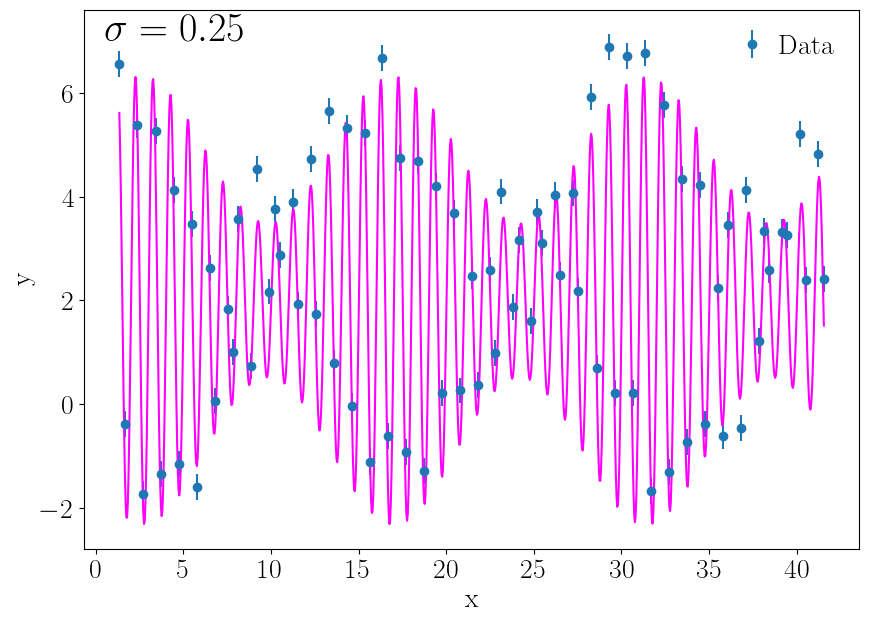

In [178]:
matplotlib.rcParams['font.family'] = ['Family1', 'serif', 'Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f, ax = plt.subplots(1,1,figsize=(10,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.text(0.5,7,r'$\sigma = 0.25$',color='0', fontsize=29)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')
#plt.ylim(-5,10)

#Need to find mean of y values to find D

# D + Asin(x)

Text(0, 0.5, 'Tide Height')

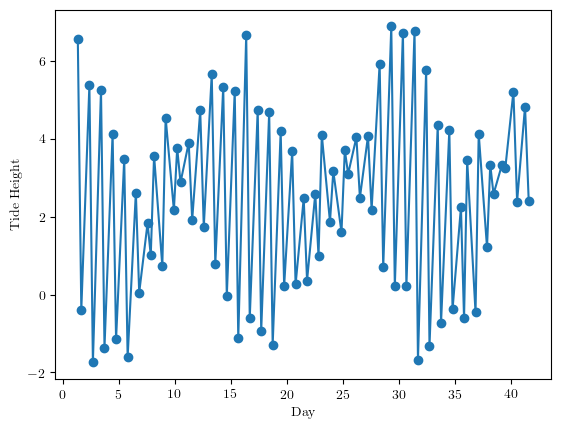

In [29]:
plt.plot(true_days, height, '-o')
plt.xlabel('Day')
plt.ylabel('Tide Height')